### Example
To find model of form $\dfrac{dy}{dy}=a+by$, however the real equation is $\dfrac{dy}{dy}=y^2-4$ with $y(0)=-2$

In [1]:
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(xs, t, ps):
    try:
        a = ps['a'].value
        b = ps['b'].value
    except:
        a, b = ps
    x = xs

    return a + b*x

def g(t, x0, ps):
    #Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

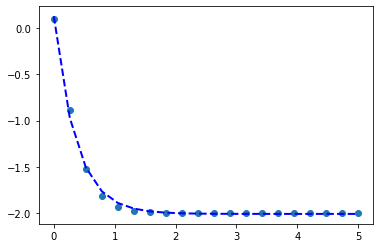

Error is:0.015189601266416315
a initial:9.093848085471755
b initial:-6.542034999278412
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 60
    # data points      = 20
    # variables        = 3
    chi-square         = 0.01518960
    reduced chi-square = 8.9351e-04
    Akaike info crit   = -137.657530
    Bayesian info crit = -134.670333
[[Variables]]
    x0:  0.12772055 +/- 0.02911176 (22.79%) (init = 0.1)
    a:  -5.52349541 +/- 0.15381414 (2.78%) (init = 9.093848)
    b:  -2.74920424 +/- 0.08036718 (2.92%) (init = -6.542035)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)  =  0.992
    C(x0, a) = -0.435
    C(x0, b) = -0.423


In [34]:
def modelo(Y,t):
    dYdt = Y**2-4
    return dYdt
Y0 = 0.1
t = np.linspace(0,5,20)

data = odeint(modelo,Y0,t)
for i in range(100):
    # set parameters incluing bounds
    a0 = 100*(np.random.rand()-0.5)
    b0 = 100*(np.random.rand()-0.5)
    params = Parameters()
    params.add('x0', value=float(data[0]), min=0, max=100)
    params.add('a', value= a0, min=-20, max=20)
    params.add('b', value= b0, min=-10, max=10)

    # fit model and find predicted values
    result = minimize(residual, params, args=(t, data), method='leastsq',max_nfev = 10000)
    final = data + result.residual.reshape(data.shape)
    
    # find minimal error
    if i == 0:
        error = result.chisqr
        a_initial = a0
        b_initial = b0
    else:
        error = np.append(error,result.chisqr)
        a_initial = np.append(a_initial,a0)
        b_initial = np.append(b_initial,b0)
position = np.argmin(error)
a0 = a_initial[position]
b0 = b_initial[position]

# plot data and fitted curves
# set parameters incluing bounds
params = Parameters()
params.add('x0', value=float(data[0]), min=0, max=100)
params.add('a', value= a0, min=-20, max=20)
params.add('b', value= b0, min=-10, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq',max_nfev = 10000)
final = data + result.residual.reshape(data.shape)
# best plot
plt.plot(t, data, 'o')
plt.plot(t, final, '--', linewidth=2, c='blue');
plt.show()
print("Error is:" + str(result.chisqr))
print("a initial:" + str(a0))
print("b initial:" + str(b0))
report_fit(result)

#### Plot solution vs best numerical solution

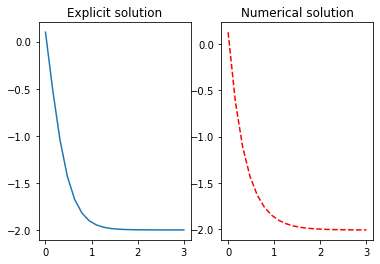

In [28]:
A = -5.52350246
B = -2.74920796
def answer(y,x):
    dydx = A + B*y
    return dydx
def solution(x):
    ys = 2*(1-(19/21)*np.exp(4*x))/(1+(19/21)*np.exp(4*x))
    return ys

y0 = 0.12772112
x = np.linspace(0,5,20)

y = odeint(answer,y0,x)
ys = solution(x)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,ys)
ax2.plot(x,y,'--r')
ax1.set_title('Explicit solution')
ax2.set_title('Numerical solution')
plt.show()

In [30]:
from numpy import linalg
y=y.transpose()
Diferencia = y - ys
error = linalg.norm(Diferencia,2)
print(error)

0.16401532461786492


On an interval biger than $[0,5]$

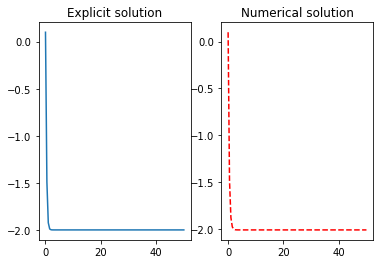

In [39]:
A = -5.52349793
B = -2.74920558
def answer(y,x):
    dydx = A + B*y
    return dydx
def solution(x):
    ys = 2*(1-(19/21)*np.exp(4*x))/(1+(19/21)*np.exp(4*x))
    return ys

y0 = 0.1
x = np.linspace(0,50,100)

y = odeint(answer,y0,x)
ys = solution(x)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,ys)
ax2.plot(x,y,'--r')
ax1.set_title('Explicit solution')
ax2.set_title('Numerical solution')
plt.show()

In [40]:
y=y.transpose()
Diferencia = y - ys
error = linalg.norm(Diferencia,2)
print(error)

0.1009134461261699
